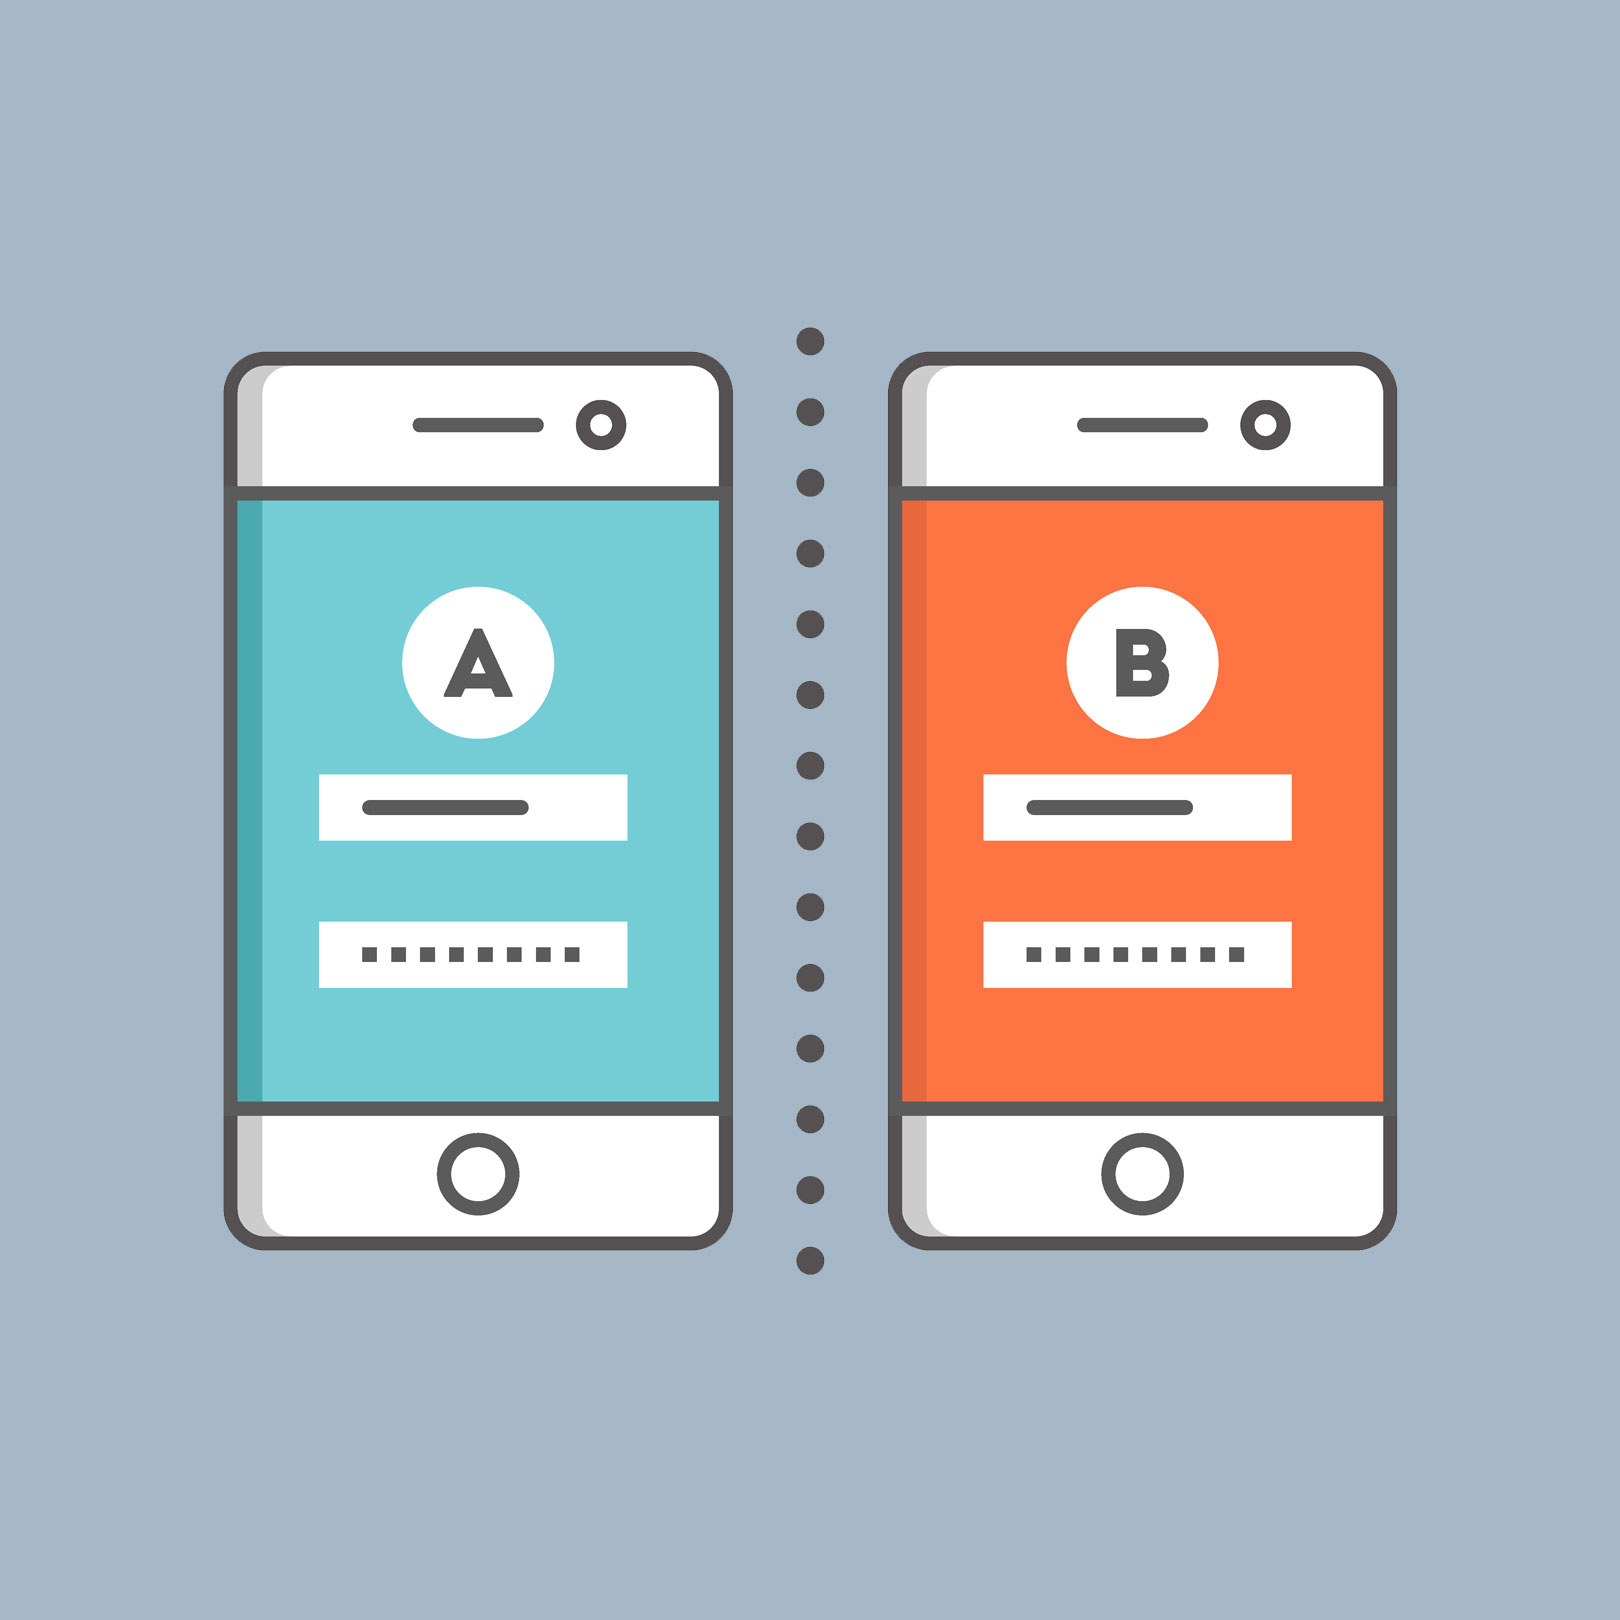

# <span style="Bradley Hand:;">WHAT IS THE AB TESTING ? </span>
A/B testing, also known as split testing, is a method of comparing two variants(A and B) to determine which one performs better. In A/B testing, two variants (A and B) are created with one element of the design or content being different between the two variants. The two versions are then shown randomly to users, and their behavior is monitored and compared to determine which variant performs better based on a predefined goal, such as the conversion rate, click-through rate, or engagement rate.

A/B testing is commonly used in website optimization, digital marketing, and product development to determine which variant is more effective at achieving a specific goal. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience and what changes can be made to improve the user experience and increase conversions.

# <span style="Bradley Hand:;">Description of Dataset </span>
**total_bill** : total price of the meal (including tip and tax)</br>
**tip**        : tip</br>
**sex**        : gender of the person paying the fee</br>
**smoker**     : Any smokers in the group?(0 = No, 1 = Yes)  
**day**        : day(Thursday, Friday, Saturday, Sunday)</br>
**time**       : when?(Day and Night)</br>
**size**       : number of people in the group</br>

In [1]:

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from mpl_toolkits.mplot3d import Axes3D


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [3]:
def check_df(dataframe, head = 5):
    print("############## Shape ##############")
    print(dataframe.shape)
    print("############## Types ##############")
    print(dataframe.dtypes)
    print("############## Head ##############")
    print(dataframe.head(head))
    print("############## Tail ##############")
    print(dataframe.tail(head))
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

############## Shape ##############
(244, 7)
############## Types ##############
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
############## Head ##############
   total_bill     tip     sex smoker  day    time  size
0    16.99000 1.01000  Female     No  Sun  Dinner     2
1    10.34000 1.66000    Male     No  Sun  Dinner     3
2    21.01000 3.50000    Male     No  Sun  Dinner     3
3    23.68000 3.31000    Male     No  Sun  Dinner     2
4    24.59000 3.61000  Female     No  Sun  Dinner     4
############## Tail ##############
     total_bill     tip     sex smoker   day    time  size
239    29.03000 5.92000    Male     No   Sat  Dinner     3
240    27.18000 2.00000  Female    Yes   Sat  Dinner     2
241    22.67000 2.00000    Male    Yes   Sat  Dinner     2
242    17.82000 1.75000    Male     No   Sat  Dinner     2
243    18.78000 3.00000  Female     No  Thu

In [4]:
# Let's examine the correlation between tip and total_bill
df["total_bill"] = df["total_bill"] - df["tip"]
df['tip'].corr(df["total_bill"])
# 0.5766634471096374 There is a slightly above moderate correlation.

0.5766634471096374

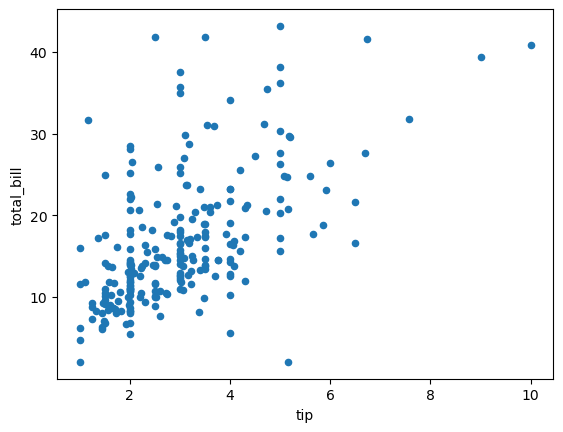

In [5]:
df.plot.scatter('tip', 'total_bill')
plt.show()
# There is a moderate positive correlation between total_bill and tip.   
# we can say that the higher the bill paid, the higher the tip given

In [6]:
# Let's convert smoker(categorical to numerical).

df["smoker"].replace(["No", "Yes"], [0, 1], inplace=True)
df.tail(10)



,total_bill,tip,sex,smoker,day,time,size
234,12.53000,3.00000,Male,1,Sat,Dinner,2
235,8.82000,1.25000,Male,0,Sat,Dinner,2
236,11.60000,1.00000,Male,1,Sat,Dinner,2
237,31.66000,1.17000,Male,1,Sat,Dinner,2
238,31.16000,4.67000,Female,0,Sat,Dinner,3
239,23.11000,5.92000,Male,0,Sat,Dinner,3
240,25.18000,2.00000,Female,1,Sat,Dinner,2
241,20.67000,2.00000,Male,1,Sat,Dinner,2
242,16.07000,1.75000,Male,0,Sat,Dinner,2
243,15.78000,3.00000,Female,0,Thur,Dinner,2


In [7]:
# Let's examine the correlation between smoker and tip

df["tip"].corr(df["smoker"])
# there is a very low level of positive correlation 0.005928539527806581

0.005928539527806581

# <span style="Bradley Hand:;">AB TESTING ? </span>
## Is There a Statistically Significant Difference Between the Tip of Smokers and Non-Smokers?

H0: S1 = S2 -> There isnot a statistically significant difference between the tip of smokers and non-smokers</br>
H1: S1! = S2 -> There is a statistically significant difference between the tip of smokers and non-smokers</br>

Checking **normality assumption and variance homogeneity**



In [8]:
# Normality assumption
# H0: The normality assumption is met.
# H1: The normality assumption is not met.
test_stat, pvalue = shapiro(df.loc[df["smoker"] == 1, 'tip']) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value < 0.05 H0 is rejected. The normality assumption is not met

Test Stat = 0.8788, p-value = 0.0000


In [9]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == 0, 'tip']) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value < 0.05 H0 is rejected. The normality assumption is not met

Test Stat = 0.9040, p-value = 0.0000


In [10]:
# Variance Homogeneity
# H0 = The variance homogeneity is met
# H1 = The variance homogeneity is not met.
test_stat, pvalue = levene(df.loc[df['smoker'] == 1, 'tip'],
                           df.loc[df['smoker'] == 0, 'tip'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value > 0.05. H0 is not rejected. The variances are homogeneous.


Test Stat = 0.0205, p-value = 0.8862


In [11]:
# Formulation of Hypotheses

# H0: S1 = S2 -> There is not a statistically significant difference between the tip of smokers and non-smokers
# H1: S1 != S2 -> There is a statistically significant difference between the tip of smokers and non-smokers
test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == 1, "tip"],
                              df.loc[df["smoker"] == 0, "tip"])
print('Test Stat %.4f, p-value %.4f' % (test_stat, pvalue))

# p_value > 0.05 is not rejected. There is not a statistically significant difference between the tip of smokers and non-smokers.

Test Stat 7163.0000, p-value 0.7919


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Thank you for supports and comments.✌️✌🏿
    </br>
You can follow me: </br>
linkedin: <a href="https://www.linkedin.com/in/yunus-emre-turkoglu-89804b193/" target="_blank"><font color=white>Visit My Profile</font></a>

</p>
</div>